# Step 1 - Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.


* Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.
* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
* Use SQLAlchemy create_engine to connect to your sqlite database.
* Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [25]:
# Dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [26]:
# create engine
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect
Base = automap_base()
Base.prepare(engine, reflect=True)
# view the classes from automap
Base.classes.keys()

['measurement', 'station']

In [27]:
# create table references

Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# create session 
session = Session(engine)

In [50]:
#create start date and end date for the trip
st_date_str = "2018-01-01" 
print(type(st_date_str))
st_date = dt.datetime.strptime(st_date_str, '%Y-%m-%d')
print(st_date)

<class 'str'>
2018-01-01 00:00:00


# Exploratory Climate Analysis

In [30]:
#gather dates and perc. from the last YTD
pastyear = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date.between('2016-09-01','2017-08-31')).\
order_by(Measurement.date.asc()).all()
pastyear

[('2016-09-01', 0.0),
 ('2016-09-01', 0.0),
 ('2016-09-01', 0.0),
 ('2016-09-01', None),
 ('2016-09-01', 0.02),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.0),
 ('2016-09-02', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-02', None),
 ('2016-09-02', None),
 ('2016-09-02', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 0.0),
 ('2016-09-03', 0.07),
 ('2016-09-03', 0.08),
 ('2016-09-03', 0.12),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.03),
 ('2016-09-04', 0.03),
 ('2016-09-04', 0.74),
 ('2016-09-04', 0.14),
 ('2016-09-04', 0.44),
 ('2016-09-05', None),
 ('2016-09-05', 0.11),
 ('2016-09-05', None),
 ('2016-09-05', 0.02),
 ('2016-09-05', 0.03),
 ('2016-09-05', 0.18),
 ('2016-09-06', None),
 ('2016-09-06', 0.05),
 ('2016-09-06', 0.04),
 ('2016-09-06', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-06', 1.0),
 ('2016-09-07', 0.05),
 ('2016-09-07', 0.1),
 ('2016-09-07', 0.23),
 ('2016-09-07', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.0),
 ('2016-09-08', 0.22),
 ('2016-09-08', 0.01

In [31]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
# Sort the DataFrame values by date.

df = pd.DataFrame(pastyear[:], columns = ['date','prcp'])
df.set_index('date', inplace=True)
df.head(10)

,prcp
date,
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,NaN
2016-09-01,0.02
2016-09-01,0.01
2016-09-02,0.00
2016-09-02,0.02
2016-09-02,0.19


In [32]:
#drop nuls 
df = df.dropna(how="any")
df.head(10)

,prcp
date,
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,0.02
2016-09-01,0.01
2016-09-02,0.00
2016-09-02,0.02
2016-09-02,0.19
2016-09-02,0.01


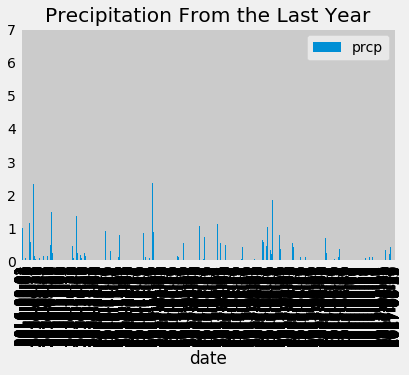

In [33]:
# Plot the results using the DataFrame plot method.
df.iloc[:].plot.bar(title='Precipitation From the Last Year', legend=True)
plt.show()

In [34]:
# Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [35]:
# Design a query to calculate the total number of stations.
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
print(columns)

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [37]:
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [44]:
# Design a query to find the most active stations.


# List the stations and observation counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Which station has the highest number of observations?
# station USC00519281 is most active
# Find high/low of most active station 
High_Low = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
High_Low

[(54.0, 85.0, 71.66378066378067)]

In [40]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
Stations_Temps = session.query(Measurement.station, func.count(Measurement.tobs)).\
filter(Measurement.date.between('2016-09-01','2017-08-31')).\
group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()
Stations_Temps

[('USC00519397', 352),
 ('USC00519281', 343),
 ('USC00516128', 341),
 ('USC00513117', 334),
 ('USC00519523', 328),
 ('USC00514830', 297),
 ('USC00517948', 176)]

In [47]:
#Filter by the station with the highest number of observations.
Highest_Obs = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.date.between('2016-09-01','2017-08-31')).\
filter(Measurement.station == 'USC00519397').\
order_by(Measurement.tobs.desc()).all()
Highest_Obs

[('USC00519397', 87.0),
 ('USC00519397', 83.0),
 ('USC00519397', 82.0),
 ('USC00519397', 82.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397',

In [48]:
df_obs = pd.DataFrame(Highest_Obs[:], columns=['station','temp'])
df_obs.head(10)

,station,temp
0,USC00519397,87.0
1,USC00519397,83.0
2,USC00519397,82.0
3,USC00519397,82.0
4,USC00519397,82.0
5,USC00519397,81.0
6,USC00519397,81.0
7,USC00519397,81.0
8,USC00519397,81.0
9,USC00519397,81.0


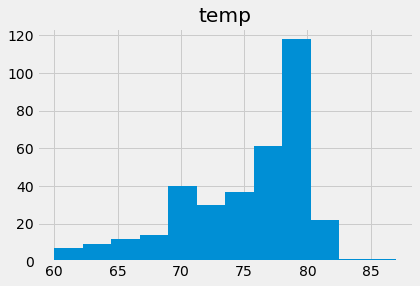

In [49]:
histogram = df_obs.hist(bins = 12)

# Temperature Analysis (Optional)


# Step 2 - Climate App